## Observations and Insights 

- Ramicane is the most effctive drug out of Capomulin, Ramicane, Infubinol, and Ceftamin as the median tumor size is the smallest at the end of the druf trial. 
- For the Capomulin regimen the tumor size decreased over time suggesting that the drug was effective in reducing tumor size.
- The smaller the weight of the mouse the smaller the tumor volume. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata_df = pd.DataFrame(mouse_metadata)
study_results_df = pd.DataFrame(study_results)

mouse_data_df = pd.merge(mouse_metadata_df, study_results_df, on = "Mouse ID", how = "outer" )

# Display the data table for preview
mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
no_mice = len(mouse_metadata["Mouse ID"])
no_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_data_df[mouse_data_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_df.loc[mouse_data_df.duplicated(), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_data_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_no_mice = clean_df["Mouse ID"].nunique()
clean_no_mice

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Need to use .groupby for regimen to find stats on tumomr volume  
mean_tumor_vol = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_vol = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor_vol = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sd_tumor_vol = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_vol = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

 
# Assemble the resulting series into a single summary dataframe.
tumor_regimen_df = pd.DataFrame({"Mean Tumor Vol": mean_tumor_vol,
                                 "Median Tumor Vol": median_tumor_vol,
                                 "Variance Tumor Vol": var_tumor_vol,
                                "Standard Deviation": sd_tumor_vol,
                                "SEM Tumor Vol": sem_tumor_vol})
tumor_regimen_df

,Mean Tumor Vol,Median Tumor Vol,Variance Tumor Vol,Standard Deviation,SEM Tumor Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Mice for each Drug Regimen'}>

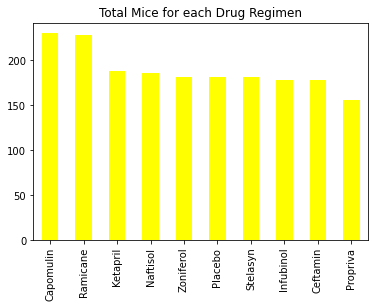

In [10]:
# Bar plot to show total mice for each drug regimen using pandas (a learning assistant told me that the 'timepoints' part of the question was incorrect and to do this bar chart instead)
counts = clean_df['Drug Regimen'].value_counts()
counts.plot(kind="bar", title = "Total Mice for each Drug Regimen", color = "yellow")


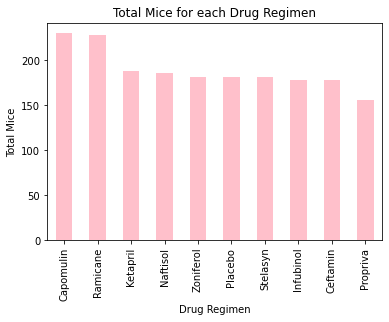

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Bar plot to show total mice for each drug regimen using py.plot (a learning assistant told me that the 'timepoints' part of the question was incorrect and to do this bar chart instead)
counts = clean_df['Drug Regimen'].value_counts()
counts.plot(kind="bar", title = "Total Mice for each Drug Regimen", color = "pink")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Total Mice")
plt.show()

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

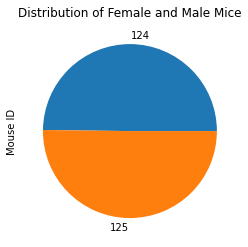

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = clean_df.groupby("Sex")["Mouse ID"].nunique()
mice_sex_pie = mice_sex.plot(kind = "pie", title = "Distribution of Female and Male Mice",
                                       labels = mice_sex)
mice_sex

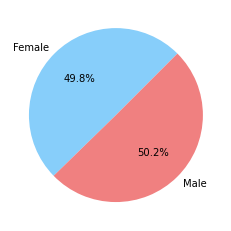

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex = clean_df.groupby("Sex")["Mouse ID"].nunique()
labels = ["Female", "Male"]
colors = ["lightskyblue", "lightcoral"]

plt.pie(mice_sex, labels = labels, startangle = 45, colors = colors, autopct='%1.1f%%')

#plt.title('Distribution of Female and Male Mice')

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Find final vol for each Mouse 

final_vol = clean_df.groupby(["Mouse ID"])["Timepoint"].max()

# Reset the index so that data can be added to clean_df

final_vol = final_vol.reset_index()

# Merge this with clean_df

mouse_data_vol_df = final_vol.merge(clean_df ,on=['Mouse ID','Timepoint'],how="left")
mouse_data_vol_df.head()

# This df shows the data for each mouse at the last timepoint (end of drug testing and therefore final vol)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [15]:
#dataframe["column_name"].isin(["list of columns"])
# The above is used instead of a for loop - use the function is in to find specific values in a column 
interested_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filter_interested_drugs = mouse_data_vol_df["Drug Regimen"].isin(interested_drugs)
required_drugs_df = mouse_data_vol_df.loc[filter_interested_drugs, :]
required_drugs_df
# method 1: dataframe.loc[row, column]  row is the conditional series and the column is the only you want to show 
# dataframe.loc[conditiona, :]
# dataframe.loc[condition, "column_name"]

# method 2: dataframe[conditional]["column_name"]
# datframe[condition]

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y793,45,Capomulin,Male,17,17,31.896238,2
241,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z578,45,Ramicane,Male,11,16,30.638696,0


In [16]:
mouse_data_vol_df.describe()

,Timepoint,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
count,249.000000,249.000000,249.000000,249.000000,249.000000
mean,32.911647,12.730924,26.116466,54.999137,1.682731
std,15.465109,7.228687,3.697003,12.655080,1.325823
min,0.000000,1.000000,15.000000,22.050126,0.000000
25%,20.000000,6.000000,25.000000,45.934712,1.000000
50%,45.000000,13.000000,27.000000,55.841410,1.000000
75%,45.000000,19.000000,29.000000,64.957562,3.000000
max,45.000000,24.000000,30.000000,78.567014,4.000000


In [17]:
# Find out if there are any outliers 
def get_outliers(series):
    quartiles = series.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = (series < lower_bound) | (series > upper_bound)
    return quartiles, iqr, lowerq, upperq, lower_bound, upper_bound, outliers

In [20]:
# Print out IQR for Capomulin
Capomulin = ["Capomulin"]
Capomulin_filter = mouse_data_vol_df["Drug Regimen"].isin(Capomulin)
Capomulin_iqr = mouse_data_vol_df.loc[Capomulin_filter, :]

#IQR = [quartiles, iqr, lowerq, upperq, lower_bound, upper_bound, outliers]
quartiles, lowerq, upperq, iqr, lower_bound, upper_bound, outliers = get_outliers(Capomulin_iqr["Tumor Volume (mm3)"])
outliers_count = Capomulin_iqr.loc[outliers]["Tumor Volume (mm3)"].count()

Capomulin_IQR = [{"Lower Quartile" : lowerq, 
                 "Upper Quartile" : upperq, 
                 "Interquartile Range" : iqr, 
                "Median": quartiles[0.5],
                "Lower Bound" : lower_bound,
                "Upper Bound" : upper_bound,
                 "Outliers" : outliers_count}]

Capomulin_IQR_df = pd.DataFrame(Capomulin_IQR)

Capomulin_IQR_df



,Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Bound,Upper Bound,Outliers
0,7.781863,32.377357,40.15922,38.125164,20.704562,51.832015,0


In [19]:
# Print out IQR for Ramicane
Ramicane = ["Ramicane"]
Ramicane_filter = mouse_data_vol_df["Drug Regimen"].isin(Ramicane)
Ramicane_iqr = mouse_data_vol_df.loc[Ramicane_filter, :]

quartiles, iqr, lowerq, upperq, lower_bound, upper_bound, outliers = get_outliers(Ramicane_iqr["Tumor Volume (mm3)"])
outliers_count = Ramicane_iqr.loc[outliers]["Tumor Volume (mm3)"].count()

Ramicane_IQR = [{"Lower Quartile" : lowerq, 
                 "Upper Quartile" : upperq, 
                 "Interquartile Range" : iqr, 
                "Median": quartiles[0.5],
                "Lower Bound" : lower_bound,
                "Upper Bound" : upper_bound,
                "Outliers" : outliers_count}]
                 
Ramicane_IQR_df = pd.DataFrame(Ramicane_IQR)

Ramicane_IQR_df

,Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Bound,Upper Bound,Outliers
0,31.56047,40.659006,9.098537,36.561652,17.912664,54.306811,0


In [21]:
# Print out IQR for Infubinol
Infubinol = ["Infubinol"]
Infubinol_filter = mouse_data_vol_df["Drug Regimen"].isin(Infubinol)
Infubinol_iqr = mouse_data_vol_df.loc[Infubinol_filter, :]

quartiles, iqr, lowerq, upperq, lower_bound, upper_bound, outliers = get_outliers(Infubinol_iqr["Tumor Volume (mm3)"])
outliers_count = Infubinol_iqr.loc[outliers]["Tumor Volume (mm3)"].count()

Infubinol_IQR = [{"Lower Quartile" : lowerq, 
                 "Upper Quartile" : upperq, 
                 "Interquartile Range" : iqr, 
                "Median": quartiles[0.5],
                "Lower Bound" : lower_bound,
                "Upper Bound" : upper_bound,
                 "Outliers" : outliers_count}]

Infubinol_IQR_df = pd.DataFrame(Infubinol_IQR)

Infubinol_IQR_df


,Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Bound,Upper Bound,Outliers
0,54.048608,65.525743,11.477135,60.16518,36.832905,82.741446,1


In [22]:
# Print out IQR for Ceftamin
Ceftamin = ["Ceftamin"]
Ceftamin_filter = mouse_data_vol_df["Drug Regimen"].isin(Ceftamin)
Ceftamin_iqr = mouse_data_vol_df.loc[Ceftamin_filter, :]

quartiles, iqr, lowerq, upperq, lower_bound, upper_bound, outliers = get_outliers(Ceftamin_iqr["Tumor Volume (mm3)"])
outliers_count = Ceftamin_iqr.loc[outliers]["Tumor Volume (mm3)"].count()

Ceftamin_IQR = [{"Lower Quartile" : lowerq, 
                 "Upper Quartile" : upperq, 
                 "Interquartile Range" : iqr, 
                "Median": quartiles[0.5],
                "Lower Bound" : lower_bound,
                "Upper Bound" : upper_bound,
                "Outliers" : outliers_count}]

Ceftamin_IQR_df = pd.DataFrame(Ceftamin_IQR)

Ceftamin_IQR_df

,Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Bound,Upper Bound,Outliers
0,48.722078,64.29983,15.577752,59.851956,25.35545,87.666458,0


<AxesSubplot:title={'center':'Final Tumor Volume for Ceftamin'}>

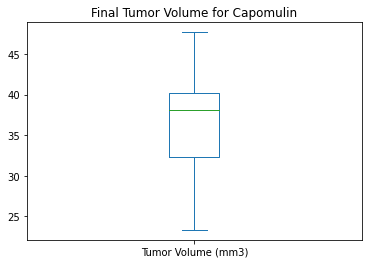

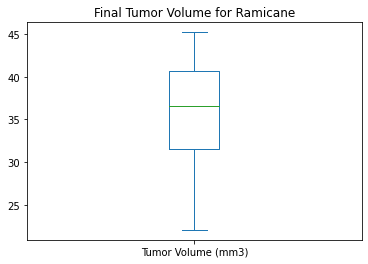

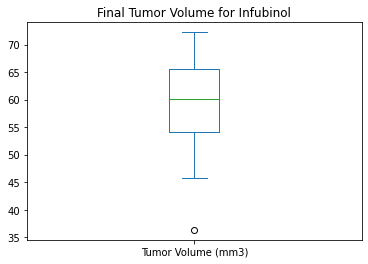

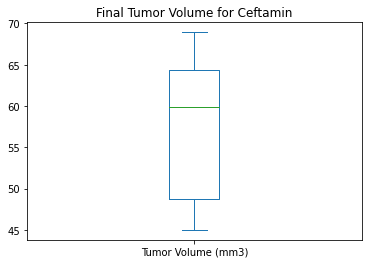

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin_iqr.plot(x='Drug Regimen', y='Tumor Volume (mm3)', kind="box", title = 'Final Tumor Volume for Capomulin')

Ramicane_iqr.plot(x='Drug Regimen', y='Tumor Volume (mm3)', kind="box", title = 'Final Tumor Volume for Ramicane')

Infubinol_iqr.plot(x='Drug Regimen', y='Tumor Volume (mm3)', kind="box", title = 'Final Tumor Volume for Infubinol')

Ceftamin_iqr.plot(x='Drug Regimen', y='Tumor Volume (mm3)', kind="box", title = 'Final Tumor Volume for Ceftamin')

## Line and Scatter Plots

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin = ["Capomulin"]
Capomulin_filter_all_data = clean_df["Drug Regimen"].isin(Capomulin)
Capomulin_tumor_time = clean_df.loc[Capomulin_filter_all_data, :]
Capomulin_tumor_time

# s185 is a mouse for the Capomulin drug regimen 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


Text(0.5, 1.0, 'Capomulin Regimen Testing of Mouse s185')

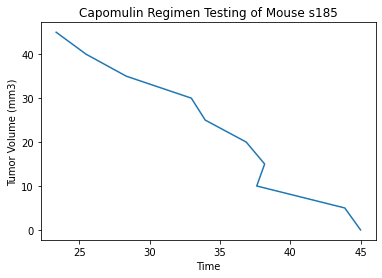

In [25]:
# Create a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = Capomulin_tumor_time.loc[Capomulin_tumor_time["Mouse ID"] == 's185']

plt.plot(mouse["Tumor Volume (mm3)"], mouse["Timepoint"])
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Regimen Testing of Mouse s185")

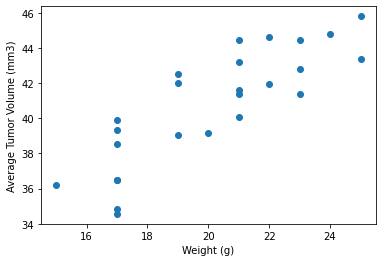

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

duplicate_mouse_ids = clean_df.loc[clean_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
clean_dropdup_df = clean_df[clean_df['Mouse ID'].isin(duplicate_mouse_ids)==False]

capomulin_table = clean_dropdup_df.loc[clean_dropdup_df['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
# Get regression values 
regress_values = capomulin_average['Weight (g)'] * slope + intercept
print(regress_values)

Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64


In [30]:
# Create line equation string 
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept, 2))
print(line_eq)

y =0.95x +21.55


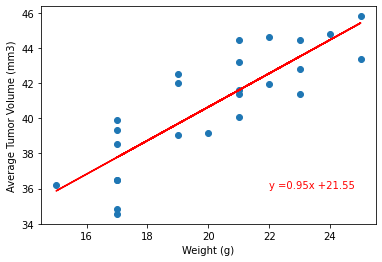

In [34]:
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],regress_values, "r")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(line_eq, (22, 36), color = "red")
plt.show()